<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/GraceDataMLTests_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data PreProcessing

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData.info

GraceData = GraceData[GraceData['Diabetes'] != '#NULL!'] # Removed bad data with no diabetes
GraceData = GraceData[GraceData['Diabetes'] != '-1']

DiabeticSamples = GraceData[GraceData["Diabetes"] == '2']

GraceData = pd.concat([GraceData, DiabeticSamples], ignore_index=True)
GraceData = pd.concat([GraceData, DiabeticSamples], ignore_index=True)
GraceData = pd.concat([GraceData, DiabeticSamples], ignore_index=True)




GraceData['Country'] = pd.factorize(GraceData['Country'])[0] + 1 # Converts 'Country' column to numerical



X = GraceData.drop(columns=["Diabetes","seriali"])
y = GraceData["Diabetes"]

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(5213, 51)
(5213,)


# Models

In [54]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ModelSelection = int(input("1 nearest neighbour, 2 decision tree, 3 random forest: "))

if ModelSelection == 1:
  parameters = {"n_neighbors":range(1,50)}
  modelType = KNeighborsClassifier(weights="distance")
elif ModelSelection == 2:
  parameters = {"max_depth":range(1,30),'max_features': range(1,10)} # Parameters for decision tree
  modelType = DecisionTreeClassifier()
elif ModelSelection == 3:
  parameters = {"random_state": range(0,50,10)} # Parameters for random forest (estimators 181)

  modelType = RandomForestClassifier(verbose=1,n_estimators = 30, max_depth = 50)#,class_weight="balanced")
else:
  print("Invalid input")

GSD = GridSearchCV(modelType,parameters)

GSD.fit(X_train_scaled,y_train) # Fit on scaled data

print(GSD.best_estimator_.score(X_test_scaled,y_test)) # Score on scaled data
print(GSD.best_params_)


1 nearest neighbour, 2 decision tree, 3 random forest: 3


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

0.9942473633748802
{'random_state': 20}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


# Confusion Matrix

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=50, n_estimators=30, verbose=1)


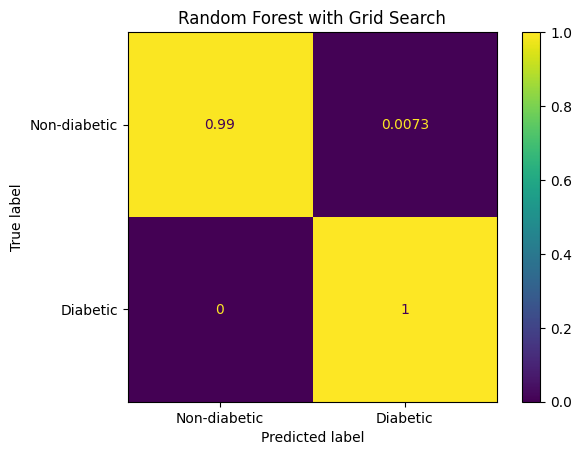


0.9942473633748802

Diet feature importance

FreeSugarspcfoodE             0.029139
FreeSugarspctotE              0.026580
FreeSugarsg                   0.022051
TotalsugarspcfoodE            0.018705
SFApcfoodE                    0.015575
totalveg                      0.015500
TotalsugarspctotE             0.015055
WHITEBREAD                    0.014927
totalfruitandveg              0.014423
SFApctotE                     0.013933
CHOpctotE                     0.013646
Totalsugarsg                  0.013645
totalfruit                    0.013335
ProcessedRedMeatg             0.013147
Saturatedfattyacidsg          0.011946
CHOpcfoodE                    0.011744
Carbohydrateg                 0.011424
Energykcal                    0.011291
totalredmeat                  0.011267
Proteing                      0.011164
FRUIT                         0.011155
Fruitvegportions              0.011133
PASTARICEANDOTHERCEREALS      0.011069
Fatg                          0.010631
Totfruitvegportion

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

PredictedResults = GSD.predict(X_test_scaled) # Predict on scaled data
ActualResults = y_test

CMlabels = ['1','2'] # Labels to match the values in y_test
DisplayLabels = ["Non-diabetic","Diabetic"] # Labels to display on the plot

cm = confusion_matrix(ActualResults, PredictedResults)
disp = ConfusionMatrixDisplay.from_estimator(GSD, X_test_scaled, y_test, normalize="true", labels=CMlabels, display_labels=DisplayLabels) # Display using scaled data and updated display_labels



#plt.title("Confusion Matrix")
print(modelType)
plt.title("Random Forest with Grid Search")#\n")
plt.show()

print("")
print(GSD.best_estimator_.score(X_test_scaled,y_test))

if ModelSelection != 1:

  myClassifiers = pd.Series(GSD.best_estimator_.feature_importances_, index=X_train.columns)

  DietImportance = myClassifiers[["Energykcal", "FoodEkcal", "Proteing", "Fatg", "Saturatedfattyacidsg", "Carbohydrateg", "Totalsugarsg", "Starchg", "FreeSugarsg", "AOACFibreg", "FatpctotE", "FatpcfoodE", "CHOpcfoodE", "CHOpctotE", "SFApcfoodE", "SFApctotE", "TotalsugarspcfoodE", "TotalsugarspctotE", "FreeSugarspcfoodE", "FreeSugarspctotE", "WHOLEMEALBREAD", "SOFTDRINKSLOWCALORIE", "SOFTDRINKSNOTLOWCALORIE", "SUGARCONFECTIONERY", "FRUIT", "NUTSANDSEEDS", "PASTARICEANDOTHERCEREALS", "SALADANDOTHERRAWVEGETABLES", "WHITEBREAD", "Beansg", "totalfruit", "totalveg", "totalfruitandveg", "Fruitvegportions", "Totfruitvegportions", "Achieve5", "ProcessedRedMeatg", "totalredmeat", "totalmeat"]]
  DietImportance = DietImportance.sort_values(ascending=False)
  print("")
  print("Diet feature importance")
  print("")
  print(DietImportance)
  print("")
  print("Diet feature importance sum")
  print(DietImportance.sum())

myClassifiers = myClassifiers.sort_values(ascending=False)
print(myClassifiers.head(15))

# Plotting Feature Importance

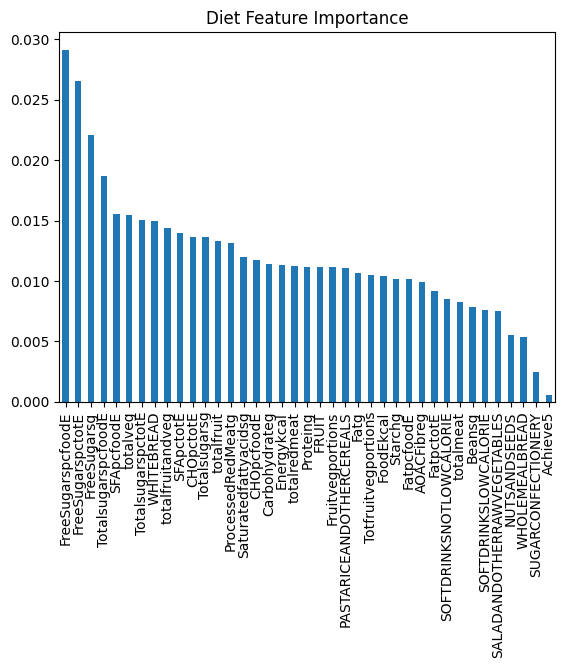

In [59]:
import matplotlib.pyplot as plt

DietImportance.plot(kind="bar")
plt.title("Diet Feature Importance")
plt.show()